In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import operator
from sklearn import metrics

In [ ]:
def eval(y_true, y_pred):
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Hasil evaluasi')
    print(f'MAD : {round(metrics.mean_absolute_error(y_true, y_pred),2)}')
    print(f'MSE : {round(metrics.mean_squared_error(y_true, y_pred),2)}')
    print(f'MAPE : {round(mean_absolute_percentage_error(y_true, y_pred),2)}')
# Fungsi MAPE
def MAPE(Y_asli, Y_pred):
  Y_asli, Y_pred = np.array(Y_asli), np.array(Y_pred)
  return np.mean(np.abs((Y_asli - Y_pred) / Y_asli)) * 100

In [ ]:
p_2022 = pd.DataFrame(data={"bulan":[1,2,3,4,5,6,7,8,9,10,11,12], "tahun":[2022,2022,2022,2022,2022,2022,2022,2022,2022,2022,2022,2022],
                                      })

In [ ]:
df = pd.read_csv("produk_tiap_bulan.csv")
df

,bulan,tahun,indeks_waktu,qty_apsdk,qty_ast,qty_eg,qty_gc,qty_jnk,qty_kp,qty_ka,qty_os,qty_sa
0,1,2020,0,592,165,91,50,5,2,65,17,120
1,2,2020,1,572,618,213,51,11,32,64,5,36
2,3,2020,2,312,486,30,89,2,110,16,9,27
3,4,2020,3,161,199,30,79,27,104,8,16,36
4,5,2020,4,347,493,60,20,2,64,63,8,35
5,6,2020,5,110,164,266,48,8,56,82,7,4
6,7,2020,6,159,264,175,38,27,50,164,5,61
7,8,2020,7,231,149,19,41,13,51,140,10,82
8,9,2020,8,311,230,17,82,6,85,201,9,52
9,10,2020,9,70,16,14,27,11,26,106,3,24


# apron pupuk sponge dop kuning

In [ ]:
df_apsdk = df[['bulan','tahun','qty_apsdk']]
df_apsdk

,bulan,tahun,qty_apsdk
0,1,2020,592
1,2,2020,572
2,3,2020,312
3,4,2020,161
4,5,2020,347
5,6,2020,110
6,7,2020,159
7,8,2020,231
8,9,2020,311
9,10,2020,70


In [ ]:
X_apsdk = df_apsdk['qty_apsdk'].values
X_train = X_apsdk[:-7]
X_test = X_apsdk[-7:]
df_2022 = p_2022

In [ ]:
temp_df = pd.DataFrame()
for i in [0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90]:
  for j in [0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90]:
    St = []
    bt = []
    X_pred_test=[]
    print(f'Alpha = {i} and Beta = {j}')
    for k in range(17):
      if k==0:
        St.append(X_train[k])
        bt.append(((X_train[k+1]-X_train[k])+(X_train[k+3]-X_train[k+2]))/2)
      else:
        St.append((i*X_train[k])+((1-i)*(St[k-1]+bt[k-1])))
        bt.append((j*(St[k]-St[k-1]))+((1-j)*bt[k-1]))
    for l in range(7):
        X_pred_test.append(round(St[16]+(bt[16]*(l+1))))
    print(X_pred_test)
    eval(X_test,X_pred_test)
    mad = round(metrics.mean_absolute_error(X_test,X_pred_test),2)
    mse = round(metrics.mean_squared_error(X_test,X_pred_test),2)
    mape = round(MAPE(X_test,X_pred_test),2)
    df3 = {'alpha':i,'beta':j,'MAD':mad,'MSE':mse,'MAPE':mape}
    temp_df = temp_df.append(df3, ignore_index=True)
temp_df.sort_values(by=['MAPE']).head(3)

Alpha = 0.1 and Beta = 0.1
[-218, -260, -301, -343, -384, -426, -467]
Hasil evaluasi
MAD : 618.86
MSE : 408090.29
MAPE : 389.17
Alpha = 0.1 and Beta = 0.2
[-75, -81, -86, -92, -98, -103, -109]
Hasil evaluasi
MAD : 368.14
MSE : 157991.29
MAPE : 173.37
Alpha = 0.1 and Beta = 0.3
[50, 72, 95, 118, 141, 164, 187]
Hasil evaluasi
MAD : 205.43
MSE : 52712.86
MAPE : 105.74
Alpha = 0.1 and Beta = 0.4
[157, 202, 247, 292, 336, 381, 426]
Hasil evaluasi
MAD : 162.0
MSE : 36454.0
MAPE : 193.22
Alpha = 0.1 and Beta = 0.5
[249, 310, 370, 431, 492, 552, 613]
Hasil evaluasi
MAD : 188.0
MSE : 68716.29
MAPE : 279.95
Alpha = 0.1 and Beta = 0.6
[326, 397, 468, 539, 611, 682, 753]
Hasil evaluasi
MAD : 263.29
MSE : 120865.86
MAPE : 359.84
Alpha = 0.1 and Beta = 0.7
[389, 466, 543, 620, 697, 775, 852]
Hasil evaluasi
MAD : 344.14
MSE : 174217.57
MAPE : 425.2
Alpha = 0.1 and Beta = 0.8
[439, 519, 598, 677, 756, 835, 914]
Hasil evaluasi
MAD : 400.71
MSE : 217776.71
MAPE : 469.08
Alpha = 0.1 and Beta = 0.9
[479, 

,alpha,beta,MAD,MSE,MAPE
54,0.7,0.1,178.14,47950.71,57.97
56,0.7,0.3,166.00,40551.71,63.99
64,0.8,0.2,191.14,54042.29,64.31


In [ ]:
temp_df.to_excel('Alpha beta optimal.xlsx', index = False)

In [ ]:
St = []
bt = []
X_pred_test=[]
ad = []
se = []
ape = []
for k in range(17):
  if k==0:
    St.append(X_train[k])
    bt.append(((X_train[k+1]-X_train[k])+(X_train[k+3]-X_train[k+2]))/2)
  else:
    St.append((0.7*X_train[k])+((1-0.7)*(St[k-1]+bt[k-1])))
    bt.append((0.1*(St[k]-St[k-1]))+((1-0.1)*bt[k-1]))
for l in range(7):
  X_pred_test.append(round(St[16]+(bt[16]*(l+1))))
  ad.append(np.abs(X_test[l]-X_pred_test[l]))
  se.append(ad[l]*ad[l])
  ape.append(round(np.abs((X_test[l]-X_pred_test[l])/X_test[l]*100), 2))
eval(X_test,X_pred_test)

Hasil evaluasi
MAD : 178.14
MSE : 47950.71
MAPE : 57.97


In [ ]:
df_hasil = df_apsdk[-7:]
df_hasil['qty_pred'] = X_pred_test
df_hasil['ad'] = ad
df_hasil['se'] = se
df_hasil['ape'] = ape
df_hasil.to_excel('Hasil Prediksi test dengan eval.xlsx', index = False)
df_hasil

<ipython-input-516-a517339f70e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hasil['qty_pred'] = X_pred_test
<ipython-input-516-a517339f70e3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hasil['ad'] = ad
<ipython-input-516-a517339f70e3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

,bulan,tahun,qty_apsdk,qty_pred,ad,se,ape
17,6,2021,291,197,94,8836,32.30
18,7,2021,364,171,193,37249,53.02
19,8,2021,76,144,68,4624,89.47
20,9,2021,451,117,334,111556,74.06
21,10,2021,272,91,181,32761,66.54
22,11,2021,439,64,375,140625,85.42
23,12,2021,40,38,2,4,5.00


In [ ]:
df_test = df_hasil[['bulan','tahun','qty_apsdk','qty_pred']]
df_test.to_excel('Hasil Prediksi test tanpa eval.xlsx', index = False)
df_test

,bulan,tahun,qty_apsdk,qty_pred
17,6,2021,291,197
18,7,2021,364,171
19,8,2021,76,144
20,9,2021,451,117
21,10,2021,272,91
22,11,2021,439,64
23,12,2021,40,38


In [ ]:
df_train = df_apsdk[:-7]
df_train['St'] = St
df_train['bt'] = bt
df_train.to_excel('Hasil Prediksi train.xlsx', index = False)
df_train

<ipython-input-518-c77d9f5f2fa6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['St'] = St
<ipython-input-518-c77d9f5f2fa6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['bt'] = bt


,bulan,tahun,qty_apsdk,St,bt
0,1,2020,592,592.000000,-85.500000
1,2,2020,572,552.350000,-80.915000
2,3,2020,312,359.830500,-92.075450
3,4,2020,161,193.026515,-99.548304
4,5,2020,347,270.943463,-81.801778
5,6,2020,110,133.742506,-87.341696
6,7,2020,159,125.220243,-79.459753
7,8,2020,231,175.428147,-66.492987
8,9,2020,311,250.380548,-52.348448
9,10,2020,70,108.409630,-61.310695


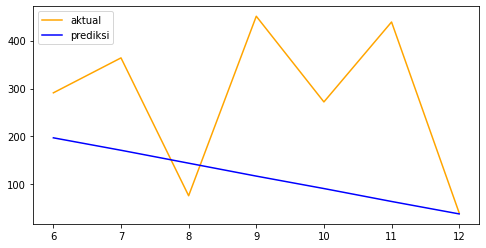

In [ ]:
# plotting perbandingan hasil aktual dan prediksi
X = df_test['bulan']
y1 = X_test
y2 = X_pred_test
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(X, y1, color='orange', label='aktual')
ax.plot(X, y2, color='blue', label='prediksi')
plt.legend(loc='best')
plt.show()

In [ ]:
X_pred2022 = []
for l in range(12):
  X_pred2022.append(round(St[16]+(bt[16]*(l+8))))
df_2022['qty_pred'] = X_pred2022
df_2022.to_excel('Hasil Prediksi 2022.xlsx', index = False)
df_2022

,bulan,tahun,qty_pred
0,1,2022,11
1,2,2022,-16
2,3,2022,-42
3,4,2022,-69
4,5,2022,-96
5,6,2022,-122
6,7,2022,-149
7,8,2022,-175
8,9,2022,-202
9,10,2022,-229


# apron semprot taslan

In [ ]:
df_ast = df[['bulan','tahun','qty_ast']]
df_ast

,bulan,tahun,qty_ast
0,1,2020,165
1,2,2020,618
2,3,2020,486
3,4,2020,199
4,5,2020,493
5,6,2020,164
6,7,2020,264
7,8,2020,149
8,9,2020,230
9,10,2020,16


In [ ]:
X_ast = df_ast['qty_ast'].values
X_train = X_ast[:-7]
X_test = X_ast[-7:]
df_2022 = p_2022

In [ ]:
temp_df = pd.DataFrame()
for i in [0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90]:
  for j in [0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90]:
    St = []
    bt = []
    X_pred_test=[]
    print(f'Alpha = {i} and Beta = {j}')
    for k in range(17):
      if k==0:
        St.append(X_train[k])
        bt.append(((X_train[k+1]-X_train[k])+(X_train[k+3]-X_train[k+2]))/2)
      else:
        St.append((i*X_train[k])+((1-i)*(St[k-1]+bt[k-1])))
        bt.append((j*(St[k]-St[k-1]))+((1-j)*bt[k-1]))
    for l in range(7):
        X_pred_test.append(round(St[16]+(bt[16]*(l+1))))
    print(X_pred_test)
    eval(X_test,X_pred_test)
    mad = round(metrics.mean_absolute_error(X_test,X_pred_test),2)
    mse = round(metrics.mean_squared_error(X_test,X_pred_test),2)
    mape = round(MAPE(X_test,X_pred_test),2)
    df3 = {'alpha':i,'beta':j,'MAD':mad,'MSE':mse,'MAPE':mape}
    temp_df = temp_df.append(df3, ignore_index=True)
temp_df.sort_values(by=['MAPE']).head(3)

Alpha = 0.1 and Beta = 0.1
[630, 654, 678, 702, 727, 751, 775]
Hasil evaluasi
MAD : 405.14
MSE : 192418.57
MAPE : 341.33
Alpha = 0.1 and Beta = 0.2
[414, 397, 380, 363, 345, 328, 311]
Hasil evaluasi
MAD : 205.86
MSE : 72742.43
MAPE : 124.85
Alpha = 0.1 and Beta = 0.3
[244, 200, 157, 114, 70, 27, -16]
Hasil evaluasi
MAD : 258.43
MSE : 139889.86
MAPE : 70.35
Alpha = 0.1 and Beta = 0.4
[114, 58, 1, -55, -111, -167, -224]
Hasil evaluasi
MAD : 427.0
MSE : 257665.0
MAPE : 180.68
Alpha = 0.1 and Beta = 0.5
[22, -37, -95, -153, -212, -270, -328]
Hasil evaluasi
MAD : 525.43
MSE : 351875.43
MAPE : 240.13
Alpha = 0.1 and Beta = 0.6
[-38, -90, -141, -193, -245, -296, -348]
Hasil evaluasi
MAD : 565.14
MSE : 393803.43
MAPE : 257.8
Alpha = 0.1 and Beta = 0.7
[-69, -107, -146, -184, -223, -261, -299]
Hasil evaluasi
MAD : 556.29
MSE : 382081.71
MAPE : 241.12
Alpha = 0.1 and Beta = 0.8
[-75, -96, -116, -137, -157, -178, -198]
Hasil evaluasi
MAD : 508.86
MSE : 331456.0
MAPE : 197.89
Alpha = 0.1 and Beta 

,alpha,beta,MAD,MSE,MAPE
26,0.3,0.9,237.57,129369.00,57.51
31,0.4,0.5,240.57,123478.86,62.71
37,0.5,0.2,281.43,150673.43,62.86


In [ ]:
temp_df.to_excel('Alpha beta optimal.xlsx', index = False)

In [ ]:
St = []
bt = []
X_pred_test=[]
ad = []
se = []
ape = []
for k in range(17):
  if k==0:
    St.append(X_train[k])
    bt.append(((X_train[k+1]-X_train[k])+(X_train[k+3]-X_train[k+2]))/2)
  else:
    St.append((0.3*X_train[k])+((1-0.3)*(St[k-1]+bt[k-1])))
    bt.append((0.9*(St[k]-St[k-1]))+((1-0.9)*bt[k-1]))
for l in range(7):
  X_pred_test.append(round(St[16]+(bt[16]*(l+1))))
  ad.append(np.abs(X_test[l]-X_pred_test[l]))
  se.append(ad[l]*ad[l])
  ape.append(round(np.abs((X_test[l]-X_pred_test[l])/X_test[l]*100), 2))
eval(X_test,X_pred_test)

Hasil evaluasi
MAD : 237.57
MSE : 129369.0
MAPE : 57.51


In [ ]:
df_hasil = df_ast[-7:]
df_hasil['qty_pred'] = X_pred_test
df_hasil['ad'] = ad
df_hasil['se'] = se
df_hasil['ape'] = ape
df_hasil.to_excel('Hasil Prediksi test dengan eval.xlsx', index = False)
df_hasil

<ipython-input-526-aa6c1fac0f45>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hasil['qty_pred'] = X_pred_test
<ipython-input-526-aa6c1fac0f45>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hasil['ad'] = ad
<ipython-input-526-aa6c1fac0f45>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

,bulan,tahun,qty_ast,qty_pred,ad,se,ape
17,6,2021,266,262,4,16,1.50
18,7,2021,372,220,152,23104,40.86
19,8,2021,268,177,91,8281,33.96
20,9,2021,964,135,829,687241,86.00
21,10,2021,498,92,406,164836,81.53
22,11,2021,193,49,144,20736,74.61
23,12,2021,44,7,37,1369,84.09


In [ ]:
df_test = df_hasil[['bulan','tahun','qty_ast','qty_pred']]
df_test.to_excel('Hasil Prediksi test tanpa eval.xlsx', index = False)
df_test

,bulan,tahun,qty_ast,qty_pred
17,6,2021,266,262
18,7,2021,372,220
19,8,2021,268,177
20,9,2021,964,135
21,10,2021,498,92
22,11,2021,193,49
23,12,2021,44,7


In [ ]:
df_train = df_ast[:-7]
df_train['St'] = St
df_train['bt'] = bt
df_train.to_excel('Hasil Prediksi train.xlsx', index = False)
df_train

<ipython-input-528-7e223231af00>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['St'] = St
<ipython-input-528-7e223231af00>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['bt'] = bt


,bulan,tahun,qty_ast,St,bt
0,1,2020,165,165.000000,83.000000
1,2,2020,618,359.000000,182.900000
2,3,2020,486,525.130000,167.807000
3,4,2020,199,544.755900,34.444010
4,5,2020,493,553.339937,11.170034
5,6,2020,164,444.356980,-96.967658
6,7,2020,264,322.372525,-119.482775
7,8,2020,149,186.722825,-134.033008
8,9,2020,230,105.882872,-86.159258
9,10,2020,16,18.606530,-87.164634


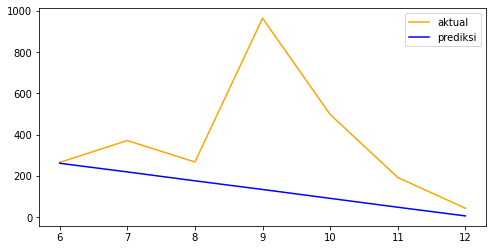

In [ ]:
# plotting perbandingan hasil aktual dan prediksi
X = df_test['bulan']
y1 = X_test
y2 = X_pred_test
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(X, y1, color='orange', label='aktual')
ax.plot(X, y2, color='blue', label='prediksi')
plt.legend(loc='best')
plt.show()

In [ ]:
X_pred2022 = []
for l in range(12):
  X_pred2022.append(round(St[16]+(bt[16]*(l+8))))
df_2022['qty_pred'] = X_pred2022
df_2022.to_excel('Hasil Prediksi 2022.xlsx', index = False)
df_2022

,bulan,tahun,qty_pred
0,1,2022,-36
1,2,2022,-79
2,3,2022,-121
3,4,2022,-164
4,5,2022,-207
5,6,2022,-249
6,7,2022,-292
7,8,2022,-334
8,9,2022,-377
9,10,2022,-420


# earplug gosave

In [ ]:
df_eg = df[['bulan','tahun','qty_eg']]
df_eg

,bulan,tahun,qty_eg
0,1,2020,91
1,2,2020,213
2,3,2020,30
3,4,2020,30
4,5,2020,60
5,6,2020,266
6,7,2020,175
7,8,2020,19
8,9,2020,17
9,10,2020,14


In [ ]:
X_eg = df_eg['qty_eg'].values
X_train = X_eg[:-7]
X_test = X_eg[-7:]
df_2022 = p_2022

In [ ]:
temp_df = pd.DataFrame()
for i in [0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90]:
  for j in [0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90]:
    St = []
    bt = []
    X_pred_test=[]
    print(f'Alpha = {i} and Beta = {j}')
    for k in range(17):
      if k==0:
        St.append(X_train[k])
        bt.append(((X_train[k+1]-X_train[k])+(X_train[k+3]-X_train[k+2]))/2)
      else:
        St.append((i*X_train[k])+((1-i)*(St[k-1]+bt[k-1])))
        bt.append((j*(St[k]-St[k-1]))+((1-j)*bt[k-1]))
    for l in range(7):
        X_pred_test.append(round(St[16]+(bt[16]*(l+1))))
    print(X_pred_test)
    eval(X_test,X_pred_test)
    mad = round(metrics.mean_absolute_error(X_test,X_pred_test),2)
    mse = round(metrics.mean_squared_error(X_test,X_pred_test),2)
    mape = round(MAPE(X_test,X_pred_test),2)
    df3 = {'alpha':i,'beta':j,'MAD':mad,'MSE':mse,'MAPE':mape}
    temp_df = temp_df.append(df3, ignore_index=True)
temp_df.sort_values(by=['MAPE']).head(3)

Alpha = 0.1 and Beta = 0.1
[351, 366, 382, 397, 413, 428, 443]
Hasil evaluasi
MAD : 208.29
MSE : 59406.57
MAPE : 84.73
Alpha = 0.1 and Beta = 0.2
[187, 173, 160, 147, 134, 121, 108]
Hasil evaluasi
MAD : 184.57
MSE : 81768.0
MAPE : 42.62
Alpha = 0.1 and Beta = 0.3
[69, 40, 11, -18, -47, -76, -104]
Hasil evaluasi
MAD : 342.14
MSE : 168068.43
MAPE : 108.55
Alpha = 0.1 and Beta = 0.4
[-12, -47, -82, -117, -152, -187, -222]
Hasil evaluasi
MAD : 441.29
MSE : 246553.29
MAPE : 150.77
Alpha = 0.1 and Beta = 0.5
[-63, -97, -132, -166, -200, -235, -269]
Hasil evaluasi
MAD : 490.29
MSE : 292144.86
MAPE : 171.54
Alpha = 0.1 and Beta = 0.6
[-92, -120, -149, -178, -207, -236, -265]
Hasil evaluasi
MAD : 502.43
MSE : 303393.0
MAPE : 176.53
Alpha = 0.1 and Beta = 0.7
[-103, -123, -144, -165, -185, -206, -227]
Hasil evaluasi
MAD : 489.0
MSE : 289518.14
MAPE : 170.54
Alpha = 0.1 and Beta = 0.8
[-101, -112, -123, -134, -145, -156, -167]
Hasil evaluasi
MAD : 458.29
MSE : 260412.86
MAPE : 157.18
Alpha = 0.1 

,alpha,beta,MAD,MSE,MAPE
1,0.1,0.2,184.57,81768.00,42.62
9,0.2,0.1,179.29,79771.86,43.32
80,0.9,0.9,203.71,91284.29,53.29


In [ ]:
temp_df.to_excel('Alpha beta optimal.xlsx', index = False)

In [ ]:
St = []
bt = []
X_pred_test=[]
ad = []
se = []
ape = []
for k in range(17):
  if k==0:
    St.append(X_train[k])
    bt.append(((X_train[k+1]-X_train[k])+(X_train[k+3]-X_train[k+2]))/2)
  else:
    St.append((0.1*X_train[k])+((1-0.1)*(St[k-1]+bt[k-1])))
    bt.append((0.2*(St[k]-St[k-1]))+((1-0.2)*bt[k-1]))
for l in range(7):
  X_pred_test.append(round(St[16]+(bt[16]*(l+1))))
  ad.append(np.abs(X_test[l]-X_pred_test[l]))
  se.append(ad[l]*ad[l])
  ape.append(round(np.abs((X_test[l]-X_pred_test[l])/X_test[l]*100), 2))
eval(X_test,X_pred_test)

Hasil evaluasi
MAD : 184.57
MSE : 81768.0
MAPE : 42.62


In [ ]:
df_hasil = df_eg[-7:]
df_hasil['qty_pred'] = X_pred_test
df_hasil['ad'] = ad
df_hasil['se'] = se
df_hasil['ape'] = ape
df_hasil.to_excel('Hasil Prediksi test dengan eval.xlsx', index = False)
df_hasil

<ipython-input-536-036c228202b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hasil['qty_pred'] = X_pred_test
<ipython-input-536-036c228202b7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hasil['ad'] = ad
<ipython-input-536-036c228202b7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

,bulan,tahun,qty_eg,qty_pred,ad,se,ape
17,6,2021,161,187,26,676,16.15
18,7,2021,288,173,115,13225,39.93
19,8,2021,856,160,696,484416,81.31
20,9,2021,248,147,101,10201,40.73
21,10,2021,273,134,139,19321,50.92
22,11,2021,125,121,4,16,3.20
23,12,2021,319,108,211,44521,66.14


In [ ]:
df_test = df_hasil[['bulan','tahun','qty_eg','qty_pred']]
df_test.to_excel('Hasil Prediksi test tanpa eval.xlsx', index = False)
df_test

,bulan,tahun,qty_eg,qty_pred
17,6,2021,161,187
18,7,2021,288,173
19,8,2021,856,160
20,9,2021,248,147
21,10,2021,273,134
22,11,2021,125,121
23,12,2021,319,108


In [ ]:
df_train = df_eg[:-7]
df_train['St'] = St
df_train['bt'] = bt
df_train.to_excel('Hasil Prediksi train.xlsx', index = False)
df_train

<ipython-input-538-3395d43c0192>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['St'] = St
<ipython-input-538-3395d43c0192>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['bt'] = bt


,bulan,tahun,qty_eg,St,bt
0,1,2020,91,91.000000,61.000000
1,2,2020,213,158.100000,62.220000
2,3,2020,30,201.288000,58.413600
3,4,2020,30,236.731440,53.819568
4,5,2020,60,267.495907,49.208548
5,6,2020,266,311.634010,48.194459
6,7,2020,175,341.345621,44.497889
7,8,2020,19,349.159160,37.161019
8,9,2020,17,349.388161,29.774616
9,10,2020,14,342.646499,22.471360


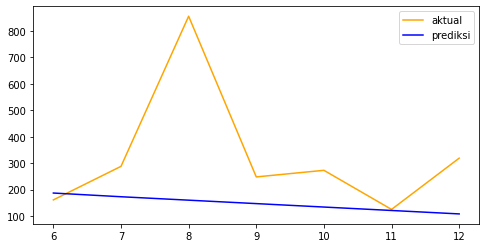

In [ ]:
# plotting perbandingan hasil aktual dan prediksi
X = df_test['bulan']
y1 = X_test
y2 = X_pred_test
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(X, y1, color='orange', label='aktual')
ax.plot(X, y2, color='blue', label='prediksi')
plt.legend(loc='best')
plt.show()

In [ ]:
X_pred2022 = []
for l in range(12):
  X_pred2022.append(round(St[16]+(bt[16]*(l+8))))
df_2022['qty_pred'] = X_pred2022
df_2022.to_excel('Hasil Prediksi 2022.xlsx', index = False)
df_2022

,bulan,tahun,qty_pred
0,1,2022,94
1,2,2022,81
2,3,2022,68
3,4,2022,55
4,5,2022,42
5,6,2022,29
6,7,2022,15
7,8,2022,2
8,9,2022,-11
9,10,2022,-24


# garu cangkul

In [ ]:
df_gc = df[['bulan','tahun','qty_gc']]
df_gc

,bulan,tahun,qty_gc
0,1,2020,50
1,2,2020,51
2,3,2020,89
3,4,2020,79
4,5,2020,20
5,6,2020,48
6,7,2020,38
7,8,2020,41
8,9,2020,82
9,10,2020,27


In [ ]:
X_gc = df_gc['qty_gc'].values
X_train = X_gc[:-7]
X_test = X_gc[-7:]
df_2022 = p_2022

In [ ]:
temp_df = pd.DataFrame()
for i in [0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90]:
  for j in [0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90]:
    St = []
    bt = []
    X_pred_test=[]
    print(f'Alpha = {i} and Beta = {j}')
    for k in range(17):
      if k==0:
        St.append(X_train[k])
        bt.append(((X_train[k+1]-X_train[k])+(X_train[k+3]-X_train[k+2]))/2)
      else:
        St.append((i*X_train[k])+((1-i)*(St[k-1]+bt[k-1])))
        bt.append((j*(St[k]-St[k-1]))+((1-j)*bt[k-1]))
    for l in range(7):
        X_pred_test.append(round(St[16]+(bt[16]*(l+1))))
    print(X_pred_test)
    eval(X_test,X_pred_test)
    mad = round(metrics.mean_absolute_error(X_test,X_pred_test),2)
    mse = round(metrics.mean_squared_error(X_test,X_pred_test),2)
    mape = round(MAPE(X_test,X_pred_test),2)
    df3 = {'alpha':i,'beta':j,'MAD':mad,'MSE':mse,'MAPE':mape}
    temp_df = temp_df.append(df3, ignore_index=True)
temp_df.sort_values(by=['MAPE']).head(3)

Alpha = 0.1 and Beta = 0.1
[9, 6, 3, 1, -2, -5, -8]
Hasil evaluasi
MAD : 52.86
MSE : 4352.86
MAPE : 98.4
Alpha = 0.1 and Beta = 0.2
[14, 12, 10, 8, 6, 4, 2]
Hasil evaluasi
MAD : 47.43
MSE : 3677.14
MAPE : 127.78
Alpha = 0.1 and Beta = 0.3
[16, 14, 12, 11, 9, 7, 5]
Hasil evaluasi
MAD : 45.43
MSE : 3452.86
MAPE : 135.04
Alpha = 0.1 and Beta = 0.4
[16, 14, 12, 10, 7, 5, 3]
Hasil evaluasi
MAD : 46.43
MSE : 3531.57
MAPE : 138.85
Alpha = 0.1 and Beta = 0.5
[15, 12, 10, 7, 4, 2, -1]
Hasil evaluasi
MAD : 48.43
MSE : 3741.86
MAPE : 131.75
Alpha = 0.1 and Beta = 0.6
[12, 10, 7, 4, 1, -2, -5]
Hasil evaluasi
MAD : 50.71
MSE : 4040.43
MAPE : 119.02
Alpha = 0.1 and Beta = 0.7
[10, 7, 4, 1, -2, -5, -9]
Hasil evaluasi
MAD : 52.86
MSE : 4326.0
MAPE : 105.3
Alpha = 0.1 and Beta = 0.8
[7, 4, 1, -2, -5, -8, -11]
Hasil evaluasi
MAD : 55.14
MSE : 4630.29
MAPE : 105.42
Alpha = 0.1 and Beta = 0.9
[5, 2, 0, -3, -6, -8, -11]
Hasil evaluasi
MAD : 56.14
MSE : 4764.71
MAPE : 114.02
Alpha = 0.2 and Beta = 0.1
[15, 

,alpha,beta,MAD,MSE,MAPE
0,0.1,0.1,52.86,4352.86,98.40
6,0.1,0.7,52.86,4326.00,105.30
7,0.1,0.8,55.14,4630.29,105.42


In [ ]:
temp_df.to_excel('Alpha beta optimal.xlsx', index = False)

In [ ]:
St = []
bt = []
X_pred_test=[]
ad = []
se = []
ape = []
for k in range(17):
  if k==0:
    St.append(X_train[k])
    bt.append(((X_train[k+1]-X_train[k])+(X_train[k+3]-X_train[k+2]))/2)
  else:
    St.append((0.1*X_train[k])+((1-0.1)*(St[k-1]+bt[k-1])))
    bt.append((0.1*(St[k]-St[k-1]))+((1-0.1)*bt[k-1]))
for l in range(7):
  X_pred_test.append(round(St[16]+(bt[16]*(l+1))))
  ad.append(np.abs(X_test[l]-X_pred_test[l]))
  se.append(ad[l]*ad[l])
  ape.append(round(np.abs((X_test[l]-X_pred_test[l])/X_test[l]*100), 2))
eval(X_test,X_pred_test)

Hasil evaluasi
MAD : 52.86
MSE : 4352.86
MAPE : 98.4


In [ ]:
df_hasil = df_gc[-7:]
df_hasil['qty_pred'] = X_pred_test
df_hasil['ad'] = ad
df_hasil['se'] = se
df_hasil['ape'] = ape
df_hasil.to_excel('Hasil Prediksi test dengan eval.xlsx', index = False)
df_hasil

<ipython-input-546-715b2e40cae6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hasil['qty_pred'] = X_pred_test
<ipython-input-546-715b2e40cae6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hasil['ad'] = ad
<ipython-input-546-715b2e40cae6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

,bulan,tahun,qty_gc,qty_pred,ad,se,ape
17,6,2021,138,9,129,16641,93.48
18,7,2021,35,6,29,841,82.86
19,8,2021,2,3,1,1,50.00
20,9,2021,72,1,71,5041,98.61
21,10,2021,61,-2,63,3969,103.28
22,11,2021,11,-5,16,256,145.45
23,12,2021,53,-8,61,3721,115.09


In [ ]:
df_test = df_hasil[['bulan','tahun','qty_gc','qty_pred']]
df_test.to_excel('Hasil Prediksi test tanpa eval.xlsx', index = False)
df_test

,bulan,tahun,qty_gc,qty_pred
17,6,2021,138,9
18,7,2021,35,6
19,8,2021,2,3
20,9,2021,72,1
21,10,2021,61,-2
22,11,2021,11,-5
23,12,2021,53,-8


In [ ]:
df_train = df_gc[:-7]
df_train['St'] = St
df_train['bt'] = bt
df_train.to_excel('Hasil Prediksi train.xlsx', index = False)
df_train

<ipython-input-548-a548528178a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['St'] = St
<ipython-input-548-a548528178a7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['bt'] = bt


,bulan,tahun,qty_gc,St,bt
0,1,2020,50,50.000000,-4.500000
1,2,2020,51,46.050000,-4.445000
2,3,2020,89,46.344500,-3.971050
3,4,2020,79,46.036105,-3.604785
4,5,2020,20,40.188188,-3.829098
5,6,2020,48,37.523182,-3.712689
6,7,2020,38,34.229444,-3.670794
7,8,2020,41,31.602785,-3.566380
8,9,2020,82,33.432765,-3.026744
9,10,2020,27,30.065418,-3.060804


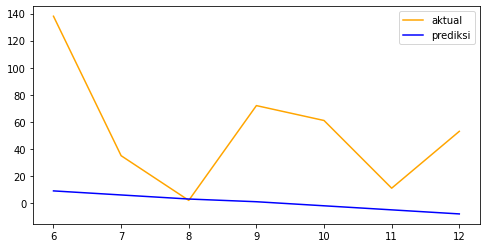

In [ ]:
# plotting perbandingan hasil aktual dan prediksi
X = df_test['bulan']
y1 = X_test
y2 = X_pred_test
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(X, y1, color='orange', label='aktual')
ax.plot(X, y2, color='blue', label='prediksi')
plt.legend(loc='best')
plt.show()

In [ ]:
X_pred2022 = []
for l in range(12):
  X_pred2022.append(round(St[16]+(bt[16]*(l+8))))
df_2022['qty_pred'] = X_pred2022
df_2022.to_excel('Hasil Prediksi 2022.xlsx', index = False)
df_2022

,bulan,tahun,qty_pred
0,1,2022,-10
1,2,2022,-13
2,3,2022,-16
3,4,2022,-18
4,5,2022,-21
5,6,2022,-24
6,7,2022,-26
7,8,2022,-29
8,9,2022,-32
9,10,2022,-35


# jet nozzle - kuningan - 2.5_

In [ ]:
df_jnk = df[['bulan','tahun','qty_jnk']]
df_jnk

,bulan,tahun,qty_jnk
0,1,2020,5
1,2,2020,11
2,3,2020,2
3,4,2020,27
4,5,2020,2
5,6,2020,8
6,7,2020,27
7,8,2020,13
8,9,2020,6
9,10,2020,11


In [ ]:
X_jnk = df_jnk['qty_jnk'].values
X_train = X_jnk[:-7]
X_test = X_jnk[-7:]
df_2022 = p_2022

In [ ]:
temp_df = pd.DataFrame()
for i in [0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90]:
  for j in [0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90]:
    St = []
    bt = []
    X_pred_test=[]
    print(f'Alpha = {i} and Beta = {j}')
    for k in range(17):
      if k==0:
        St.append(X_train[k])
        bt.append(((X_train[k+1]-X_train[k])+(X_train[k+3]-X_train[k+2]))/2)
      else:
        St.append((i*X_train[k])+((1-i)*(St[k-1]+bt[k-1])))
        bt.append((j*(St[k]-St[k-1]))+((1-j)*bt[k-1]))
    for l in range(7):
        X_pred_test.append(round(St[16]+(bt[16]*(l+1))))
    print(X_pred_test)
    eval(X_test,X_pred_test)
    mad = round(metrics.mean_absolute_error(X_test,X_pred_test),2)
    mse = round(metrics.mean_squared_error(X_test,X_pred_test),2)
    mape = round(MAPE(X_test,X_pred_test),2)
    df3 = {'alpha':i,'beta':j,'MAD':mad,'MSE':mse,'MAPE':mape}
    temp_df = temp_df.append(df3, ignore_index=True)
temp_df.sort_values(by=['MAPE']).head(3)

Alpha = 0.1 and Beta = 0.1
[92, 98, 103, 108, 113, 118, 123]
Hasil evaluasi
MAD : 78.29
MSE : 7028.57
MAPE : 926.56
Alpha = 0.1 and Beta = 0.2
[56, 55, 53, 52, 51, 50, 48]
Hasil evaluasi
MAD : 27.14
MSE : 932.57
MAPE : 344.47
Alpha = 0.1 and Beta = 0.3
[30, 25, 20, 16, 11, 6, 1]
Hasil evaluasi
MAD : 15.14
MSE : 496.0
MAPE : 43.91
Alpha = 0.1 and Beta = 0.4
[13, 6, 0, -6, -12, -18, -24]
Hasil evaluasi
MAD : 35.43
MSE : 1535.14
MAPE : 246.24
Alpha = 0.1 and Beta = 0.5
[2, -4, -10, -16, -22, -28, -34]
Hasil evaluasi
MAD : 45.57
MSE : 2350.71
MAPE : 334.62
Alpha = 0.1 and Beta = 0.6
[-4, -9, -14, -19, -24, -29, -34]
Hasil evaluasi
MAD : 48.57
MSE : 2649.71
MAPE : 345.29
Alpha = 0.1 and Beta = 0.7
[-6, -9, -12, -16, -19, -22, -26]
Hasil evaluasi
MAD : 45.29
MSE : 2381.29
MAPE : 291.35
Alpha = 0.1 and Beta = 0.8
[-5, -6, -8, -9, -10, -12, -13]
Hasil evaluasi
MAD : 38.57
MSE : 1905.71
MAPE : 200.33
Alpha = 0.1 and Beta = 0.9
[-2, -2, -1, -1, 0, 0, 1]
Hasil evaluasi
MAD : 30.29
MSE : 1441.71
M

,alpha,beta,MAD,MSE,MAPE
2,0.1,0.3,15.14,496.00,43.91
41,0.5,0.6,20.71,815.00,52.83
34,0.4,0.8,20.71,809.57,58.12


In [ ]:
temp_df.to_excel('Alpha beta optimal.xlsx', index = False)

In [ ]:
St = []
bt = []
X_pred_test=[]
ad = []
se = []
ape = []
for k in range(17):
  if k==0:
    St.append(X_train[k])
    bt.append(((X_train[k+1]-X_train[k])+(X_train[k+3]-X_train[k+2]))/2)
  else:
    St.append((0.1*X_train[k])+((1-0.1)*(St[k-1]+bt[k-1])))
    bt.append((0.3*(St[k]-St[k-1]))+((1-0.3)*bt[k-1]))
for l in range(7):
  X_pred_test.append(round(St[16]+(bt[16]*(l+1))))
  ad.append(np.abs(X_test[l]-X_pred_test[l]))
  se.append(ad[l]*ad[l])
  ape.append(round(np.abs((X_test[l]-X_pred_test[l])/X_test[l]*100), 2))
eval(X_test,X_pred_test)

Hasil evaluasi
MAD : 15.14
MSE : 496.0
MAPE : 43.91


In [ ]:
df_hasil = df_jnk[-7:]
df_hasil['qty_pred'] = X_pred_test
df_hasil['ad'] = ad
df_hasil['se'] = se
df_hasil['ape'] = ape
df_hasil.to_excel('Hasil Prediksi test dengan eval.xlsx', index = False)
df_hasil

<ipython-input-556-b5b7d034c069>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hasil['qty_pred'] = X_pred_test
<ipython-input-556-b5b7d034c069>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hasil['ad'] = ad
<ipython-input-556-b5b7d034c069>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

,bulan,tahun,qty_jnk,qty_pred,ad,se,ape
17,6,2021,27,30,3,9,11.11
18,7,2021,63,25,38,1444,60.32
19,8,2021,61,20,41,1681,67.21
20,9,2021,15,16,1,1,6.67
21,10,2021,29,11,18,324,62.07
22,11,2021,9,6,3,9,33.33
23,12,2021,3,1,2,4,66.67


In [ ]:
df_test = df_hasil[['bulan','tahun','qty_jnk','qty_pred']]
df_test.to_excel('Hasil Prediksi test tanpa eval.xlsx', index = False)
df_test

,bulan,tahun,qty_jnk,qty_pred
17,6,2021,27,30
18,7,2021,63,25
19,8,2021,61,20
20,9,2021,15,16
21,10,2021,29,11
22,11,2021,9,6
23,12,2021,3,1


In [ ]:
df_train = df_jnk[:-7]
df_train['St'] = St
df_train['bt'] = bt
df_train.to_excel('Hasil Prediksi train.xlsx', index = False)
df_train

<ipython-input-558-5b25063017c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['St'] = St
<ipython-input-558-5b25063017c0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['bt'] = bt


,bulan,tahun,qty_jnk,St,bt
0,1,2020,5,5.000000,15.500000
1,2,2020,11,19.550000,15.215000
2,3,2020,2,31.488500,14.232050
3,4,2020,27,43.848495,13.670434
4,5,2020,2,51.967036,12.004866
5,6,2020,8,58.374711,10.325709
6,7,2020,27,64.530378,9.074696
7,8,2020,13,67.544566,7.256544
8,9,2020,6,67.920999,5.192510
9,10,2020,11,66.902159,3.329105


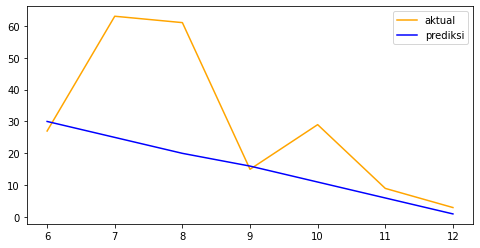

In [ ]:
# plotting perbandingan hasil aktual dan prediksi
X = df_test['bulan']
y1 = X_test
y2 = X_pred_test
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(X, y1, color='orange', label='aktual')
ax.plot(X, y2, color='blue', label='prediksi')
plt.legend(loc='best')
plt.show()

In [ ]:
X_pred2022 = []
for l in range(12):
  X_pred2022.append(round(St[16]+(bt[16]*(l+8))))
df_2022['qty_pred'] = X_pred2022
df_2022.to_excel('Hasil Prediksi 2022.xlsx', index = False)
df_2022

,bulan,tahun,qty_pred
0,1,2022,-3
1,2,2022,-8
2,3,2022,-13
3,4,2022,-17
4,5,2022,-22
5,6,2022,-27
6,7,2022,-32
7,8,2022,-36
8,9,2022,-41
9,10,2022,-46


# kapak pulaski

In [ ]:
df_kp = df[['bulan','tahun','qty_kp']]
df_kp

,bulan,tahun,qty_kp
0,1,2020,2
1,2,2020,32
2,3,2020,110
3,4,2020,104
4,5,2020,64
5,6,2020,56
6,7,2020,50
7,8,2020,51
8,9,2020,85
9,10,2020,26


In [ ]:
X_kp = df_kp['qty_kp'].values
X_train = X_kp[:-7]
X_test = X_kp[-7:]
df_2022 = p_2022

In [ ]:
temp_df = pd.DataFrame()
for i in [0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90]:
  for j in [0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90]:
    St = []
    bt = []
    X_pred_test=[]
    print(f'Alpha = {i} and Beta = {j}')
    for k in range(17):
      if k==0:
        St.append(X_train[k])
        bt.append(((X_train[k+1]-X_train[k])+(X_train[k+3]-X_train[k+2]))/2)
      else:
        St.append((i*X_train[k])+((1-i)*(St[k-1]+bt[k-1])))
        bt.append((j*(St[k]-St[k-1]))+((1-j)*bt[k-1]))
    for l in range(7):
        X_pred_test.append(round(St[16]+(bt[16]*(l+1))))
    print(X_pred_test)
    eval(X_test,X_pred_test)
    mad = round(metrics.mean_absolute_error(X_test,X_pred_test),2)
    mse = round(metrics.mean_squared_error(X_test,X_pred_test),2)
    mape = round(MAPE(X_test,X_pred_test),2)
    df3 = {'alpha':i,'beta':j,'MAD':mad,'MSE':mse,'MAPE':mape}
    temp_df = temp_df.append(df3, ignore_index=True)
temp_df.sort_values(by=['MAPE']).head(3)

Alpha = 0.1 and Beta = 0.1
[112, 117, 122, 127, 132, 137, 143]
Hasil evaluasi
MAD : 77.71
MSE : 8034.29
MAPE : 502.25
Alpha = 0.1 and Beta = 0.2
[88, 86, 85, 84, 83, 82, 81]
Hasil evaluasi
MAD : 55.29
MSE : 3199.0
MAPE : 318.61
Alpha = 0.1 and Beta = 0.3
[64, 58, 51, 45, 39, 33, 26]
Hasil evaluasi
MAD : 36.57
MSE : 2304.57
MAPE : 155.43
Alpha = 0.1 and Beta = 0.4
[42, 32, 22, 12, 1, -9, -19]
Hasil evaluasi
MAD : 48.14
MSE : 4152.14
MAPE : 112.7
Alpha = 0.1 and Beta = 0.5
[23, 10, -3, -15, -28, -41, -53]
Hasil evaluasi
MAD : 70.43
MSE : 7263.0
MAPE : 163.24
Alpha = 0.1 and Beta = 0.6
[6, -8, -21, -35, -49, -63, -77]
Hasil evaluasi
MAD : 90.43
MSE : 10547.29
MAPE : 255.27
Alpha = 0.1 and Beta = 0.7
[-7, -20, -34, -48, -62, -76, -89]
Hasil evaluasi
MAD : 103.14
MSE : 13015.71
MAPE : 315.99
Alpha = 0.1 and Beta = 0.8
[-16, -29, -41, -54, -66, -79, -92]
Hasil evaluasi
MAD : 109.0
MSE : 14176.71
MAPE : 344.9
Alpha = 0.1 and Beta = 0.9
[-23, -33, -43, -54, -64, -74, -85]
Hasil evaluasi
MAD : 

,alpha,beta,MAD,MSE,MAPE
14,0.2,0.6,46.86,4628.29,68.35
21,0.3,0.4,38.43,3468.71,79.99
20,0.3,0.3,44.86,4058.86,83.24


In [ ]:
temp_df.to_excel('Alpha beta optimal.xlsx', index = False)

In [ ]:
St = []
bt = []
X_pred_test=[]
ad = []
se = []
ape = []
for k in range(17):
  if k==0:
    St.append(X_train[k])
    bt.append(((X_train[k+1]-X_train[k])+(X_train[k+3]-X_train[k+2]))/2)
  else:
    St.append((0.2*X_train[k])+((1-0.2)*(St[k-1]+bt[k-1])))
    bt.append((0.6*(St[k]-St[k-1]))+((1-0.6)*bt[k-1]))
for l in range(7):
  X_pred_test.append(round(St[16]+(bt[16]*(l+1))))
  ad.append(np.abs(X_test[l]-X_pred_test[l]))
  se.append(ad[l]*ad[l])
  ape.append(round(np.abs((X_test[l]-X_pred_test[l])/X_test[l]*100), 2))
eval(X_test,X_pred_test)

Hasil evaluasi
MAD : 46.86
MSE : 4628.29
MAPE : 68.35


In [ ]:
df_hasil = df_kp[-7:]
df_hasil['qty_pred'] = X_pred_test
df_hasil['ad'] = ad
df_hasil['se'] = se
df_hasil['ape'] = ape
df_hasil.to_excel('Hasil Prediksi test dengan eval.xlsx', index = False)
df_hasil

<ipython-input-566-4d229fbcc7d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hasil['qty_pred'] = X_pred_test
<ipython-input-566-4d229fbcc7d4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hasil['ad'] = ad
<ipython-input-566-4d229fbcc7d4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

,bulan,tahun,qty_kp,qty_pred,ad,se,ape
17,6,2021,132,7,125,15625,94.70
18,7,2021,42,8,34,1156,80.95
19,8,2021,6,8,2,4,33.33
20,9,2021,18,9,9,81,50.00
21,10,2021,131,9,122,14884,93.13
22,11,2021,28,10,18,324,64.29
23,12,2021,29,11,18,324,62.07


In [ ]:
df_test = df_hasil[['bulan','tahun','qty_kp','qty_pred']]
df_test.to_excel('Hasil Prediksi test tanpa eval.xlsx', index = False)
df_test

,bulan,tahun,qty_kp,qty_pred
17,6,2021,132,7
18,7,2021,42,8
19,8,2021,6,8
20,9,2021,18,9
21,10,2021,131,9
22,11,2021,28,10
23,12,2021,29,11


In [ ]:
df_train = df_kp[:-7]
df_train['St'] = St
df_train['bt'] = bt
df_train.to_excel('Hasil Prediksi train.xlsx', index = False)
df_train

<ipython-input-568-a16756127067>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['St'] = St
<ipython-input-568-a16756127067>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['bt'] = bt


,bulan,tahun,qty_kp,St,bt
0,1,2020,2,2.000000,12.000000
1,2,2020,32,17.600000,14.160000
2,3,2020,110,47.408000,23.548800
3,4,2020,104,77.565440,27.513984
4,5,2020,64,96.863539,22.584453
5,6,2020,56,106.758394,14.970694
6,7,2020,50,107.383270,6.363203
7,8,2020,51,101.197179,-1.166373
8,9,2020,85,97.024645,-2.970070
9,10,2020,26,80.443660,-11.136619


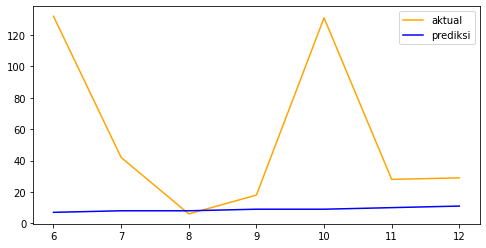

In [ ]:
# plotting perbandingan hasil aktual dan prediksi
X = df_test['bulan']
y1 = X_test
y2 = X_pred_test
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(X, y1, color='orange', label='aktual')
ax.plot(X, y2, color='blue', label='prediksi')
plt.legend(loc='best')
plt.show()

In [ ]:
X_pred2022 = []
for l in range(12):
  X_pred2022.append(round(St[16]+(bt[16]*(l+8))))
df_2022['qty_pred'] = X_pred2022
df_2022.to_excel('Hasil Prediksi 2022.xlsx', index = False)
df_2022

,bulan,tahun,qty_pred
0,1,2022,11
1,2,2022,12
2,3,2022,12
3,4,2022,13
4,5,2022,13
5,6,2022,14
6,7,2022,14
7,8,2022,15
8,9,2022,15
9,10,2022,16


# kepyok api

In [ ]:
df_ka = df[['bulan','tahun','qty_ka']]
df_ka

,bulan,tahun,qty_ka
0,1,2020,65
1,2,2020,64
2,3,2020,16
3,4,2020,8
4,5,2020,63
5,6,2020,82
6,7,2020,164
7,8,2020,140
8,9,2020,201
9,10,2020,106


In [ ]:
X_ka = df_ka['qty_ka'].values
X_train = X_ka[:-7]
X_test = X_ka[-7:]
df_2022 = p_2022

In [ ]:
temp_df = pd.DataFrame()
for i in [0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90]:
  for j in [0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90]:
    St = []
    bt = []
    X_pred_test=[]
    print(f'Alpha = {i} and Beta = {j}')
    for k in range(17):
      if k==0:
        St.append(X_train[k])
        bt.append(((X_train[k+1]-X_train[k])+(X_train[k+3]-X_train[k+2]))/2)
      else:
        St.append((i*X_train[k])+((1-i)*(St[k-1]+bt[k-1])))
        bt.append((j*(St[k]-St[k-1]))+((1-j)*bt[k-1]))
    for l in range(7):
        X_pred_test.append(round(St[16]+(bt[16]*(l+1))))
    print(X_pred_test)
    eval(X_test,X_pred_test)
    mad = round(metrics.mean_absolute_error(X_test,X_pred_test),2)
    mse = round(metrics.mean_squared_error(X_test,X_pred_test),2)
    mape = round(MAPE(X_test,X_pred_test),2)
    df3 = {'alpha':i,'beta':j,'MAD':mad,'MSE':mse,'MAPE':mape}
    temp_df = temp_df.append(df3, ignore_index=True)
temp_df.sort_values(by=['MAPE']).head(3)

Alpha = 0.1 and Beta = 0.1
[64, 63, 62, 62, 61, 60, 60]
Hasil evaluasi
MAD : 23.57
MSE : 832.43
MAPE : 115.6
Alpha = 0.1 and Beta = 0.2
[82, 83, 84, 85, 86, 87, 88]
Hasil evaluasi
MAD : 46.86
MSE : 2482.0
MAPE : 199.88
Alpha = 0.1 and Beta = 0.3
[94, 95, 95, 96, 97, 98, 99]
Hasil evaluasi
MAD : 58.14
MSE : 3666.14
MAPE : 239.22
Alpha = 0.1 and Beta = 0.4
[101, 100, 99, 98, 98, 97, 96]
Hasil evaluasi
MAD : 60.29
MSE : 3898.57
MAPE : 243.4
Alpha = 0.1 and Beta = 0.5
[103, 99, 96, 92, 89, 85, 82]
Hasil evaluasi
MAD : 54.14
MSE : 3222.43
MAPE : 217.16
Alpha = 0.1 and Beta = 0.6
[101, 94, 87, 80, 73, 66, 59]
Hasil evaluasi
MAD : 41.86
MSE : 2159.57
MAPE : 167.62
Alpha = 0.1 and Beta = 0.7
[96, 85, 73, 62, 51, 40, 29]
Hasil evaluasi
MAD : 30.14
MSE : 1259.29
MAPE : 108.79
Alpha = 0.1 and Beta = 0.8
[88, 72, 57, 42, 26, 11, -5]
Hasil evaluasi
MAD : 30.0
MSE : 1101.71
MAPE : 95.64
Alpha = 0.1 and Beta = 0.9
[78, 58, 38, 18, -1, -21, -41]
Hasil evaluasi
MAD : 37.43
MSE : 2048.0
MAPE : 122.6
Alp

,alpha,beta,MAD,MSE,MAPE
39,0.5,0.4,15.71,414.57,38.92
38,0.5,0.3,17.43,503.43,43.87
25,0.3,0.8,19.29,545.86,45.28


In [ ]:
temp_df.to_excel('Alpha beta optimal.xlsx', index = False)

In [ ]:
St = []
bt = []
X_pred_test=[]
ad = []
se = []
ape = []
for k in range(17):
  if k==0:
    St.append(X_train[k])
    bt.append(((X_train[k+1]-X_train[k])+(X_train[k+3]-X_train[k+2]))/2)
  else:
    St.append((0.5*X_train[k])+((1-0.5)*(St[k-1]+bt[k-1])))
    bt.append((0.4*(St[k]-St[k-1]))+((1-0.4)*bt[k-1]))
for l in range(7):
  X_pred_test.append(round(St[16]+(bt[16]*(l+1))))
  ad.append(np.abs(X_test[l]-X_pred_test[l]))
  se.append(ad[l]*ad[l])
  ape.append(round(np.abs((X_test[l]-X_pred_test[l])/X_test[l]*100), 2))
eval(X_test,X_pred_test)

Hasil evaluasi
MAD : 15.71
MSE : 414.57
MAPE : 38.92


In [ ]:
df_hasil = df_ka[-7:]
df_hasil['qty_pred'] = X_pred_test
df_hasil['ad'] = ad
df_hasil['se'] = se
df_hasil['ape'] = ape
df_hasil.to_excel('Hasil Prediksi test dengan eval.xlsx', index = False)
df_hasil

<ipython-input-576-79d903e1dc36>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hasil['qty_pred'] = X_pred_test
<ipython-input-576-79d903e1dc36>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hasil['ad'] = ad
<ipython-input-576-79d903e1dc36>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

,bulan,tahun,qty_ka,qty_pred,ad,se,ape
17,6,2021,34,45,11,121,32.35
18,7,2021,41,40,1,1,2.44
19,8,2021,50,35,15,225,30.00
20,9,2021,17,30,13,169,76.47
21,10,2021,60,24,36,1296,60.00
22,11,2021,52,19,33,1089,63.46
23,12,2021,13,14,1,1,7.69


In [ ]:
df_test = df_hasil[['bulan','tahun','qty_ka','qty_pred']]
df_test.to_excel('Hasil Prediksi test tanpa eval.xlsx', index = False)
df_test

,bulan,tahun,qty_ka,qty_pred
17,6,2021,34,45
18,7,2021,41,40
19,8,2021,50,35
20,9,2021,17,30
21,10,2021,60,24
22,11,2021,52,19
23,12,2021,13,14


In [ ]:
df_train = df_ka[:-7]
df_train['St'] = St
df_train['bt'] = bt
df_train.to_excel('Hasil Prediksi train.xlsx', index = False)
df_train

<ipython-input-578-99e0d13443d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['St'] = St
<ipython-input-578-99e0d13443d7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['bt'] = bt


,bulan,tahun,qty_ka,St,bt
0,1,2020,65,65.000000,-4.500000
1,2,2020,64,62.250000,-3.800000
2,3,2020,16,37.225000,-12.290000
3,4,2020,8,16.467500,-15.677000
4,5,2020,63,31.895250,-3.235100
5,6,2020,82,55.330075,7.432870
6,7,2020,164,113.381473,27.680281
7,8,2020,140,140.530877,27.467930
8,9,2020,201,184.499404,34.068169
9,10,2020,106,162.283786,11.554654


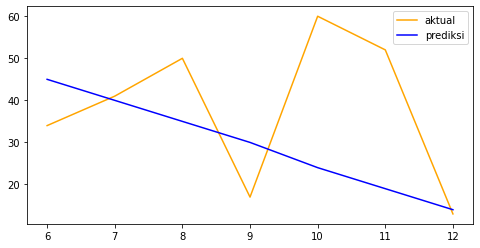

In [ ]:
# plotting perbandingan hasil aktual dan prediksi
X = df_test['bulan']
y1 = X_test
y2 = X_pred_test
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(X, y1, color='orange', label='aktual')
ax.plot(X, y2, color='blue', label='prediksi')
plt.legend(loc='best')
plt.show()

In [ ]:
X_pred2022 = []
for l in range(12):
  X_pred2022.append(round(St[16]+(bt[16]*(l+8))))
df_2022['qty_pred'] = X_pred2022
df_2022.to_excel('Hasil Prediksi 2022.xlsx', index = False)
df_2022

,bulan,tahun,qty_pred
0,1,2022,9
1,2,2022,3
2,3,2022,-2
3,4,2022,-7
4,5,2022,-13
5,6,2022,-18
6,7,2022,-23
7,8,2022,-28
8,9,2022,-34
9,10,2022,-39


# obor sulut

In [ ]:
df_os = df[['bulan','tahun','qty_os']]
df_os

,bulan,tahun,qty_os
0,1,2020,17
1,2,2020,5
2,3,2020,9
3,4,2020,16
4,5,2020,8
5,6,2020,7
6,7,2020,5
7,8,2020,10
8,9,2020,9
9,10,2020,3


In [ ]:
X_os = df_os['qty_os'].values
X_train = X_os[:-7]
X_test = X_os[-7:]
df_2022 = p_2022

In [ ]:
temp_df = pd.DataFrame()
for i in [0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90]:
  for j in [0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90]:
    St = []
    bt = []
    X_pred_test=[]
    print(f'Alpha = {i} and Beta = {j}')
    for k in range(17):
      if k==0:
        St.append(X_train[k])
        bt.append(((X_train[k+1]-X_train[k])+(X_train[k+3]-X_train[k+2]))/2)
      else:
        St.append((i*X_train[k])+((1-i)*(St[k-1]+bt[k-1])))
        bt.append((j*(St[k]-St[k-1]))+((1-j)*bt[k-1]))
    for l in range(7):
        X_pred_test.append(round(St[16]+(bt[16]*(l+1))))
    print(X_pred_test)
    eval(X_test,X_pred_test)
    mad = round(metrics.mean_absolute_error(X_test,X_pred_test),2)
    mse = round(metrics.mean_squared_error(X_test,X_pred_test),2)
    mape = round(MAPE(X_test,X_pred_test),2)
    df3 = {'alpha':i,'beta':j,'MAD':mad,'MSE':mse,'MAPE':mape}
    temp_df = temp_df.append(df3, ignore_index=True)
temp_df.sort_values(by=['MAPE']).head(3)

Alpha = 0.1 and Beta = 0.1
[-7, -8, -10, -11, -12, -13, -15]
Hasil evaluasi
MAD : 17.14
MSE : 362.86
MAPE : 483.05
Alpha = 0.1 and Beta = 0.2
[-3, -3, -3, -4, -4, -4, -5]
Hasil evaluasi
MAD : 10.0
MSE : 162.29
MAPE : 227.46
Alpha = 0.1 and Beta = 0.3
[1, 1, 2, 2, 2, 3, 3]
Hasil evaluasi
MAD : 4.86
MSE : 81.71
MAPE : 53.96
Alpha = 0.1 and Beta = 0.4
[4, 5, 5, 6, 7, 8, 9]
Hasil evaluasi
MAD : 6.0
MSE : 62.86
MAPE : 154.5
Alpha = 0.1 and Beta = 0.5
[6, 7, 8, 9, 10, 12, 13]
Hasil evaluasi
MAD : 7.57
MSE : 76.43
MAPE : 251.09
Alpha = 0.1 and Beta = 0.6
[8, 9, 10, 11, 13, 14, 15]
Hasil evaluasi
MAD : 8.57
MSE : 88.86
MAPE : 311.28
Alpha = 0.1 and Beta = 0.7
[9, 10, 11, 13, 14, 15, 16]
Hasil evaluasi
MAD : 9.43
MSE : 102.86
MAPE : 348.46
Alpha = 0.1 and Beta = 0.8
[10, 11, 12, 13, 14, 15, 16]
Hasil evaluasi
MAD : 9.86
MSE : 108.43
MAPE : 362.41
Alpha = 0.1 and Beta = 0.9
[10, 11, 12, 13, 14, 14, 15]
Hasil evaluasi
MAD : 9.57
MSE : 101.0
MAPE : 348.12
Alpha = 0.2 and Beta = 0.1
[1, 0, -1, -2, 

,alpha,beta,MAD,MSE,MAPE
36,0.5,0.1,4.00,70.57,43.18
27,0.4,0.1,4.14,76.71,43.41
72,0.9,0.1,4.14,70.71,50.33


In [ ]:
temp_df.to_excel('Alpha beta optimal.xlsx', index = False)

In [ ]:
St = []
bt = []
X_pred_test=[]
ad = []
se = []
ape = []
for k in range(17):
  if k==0:
    St.append(X_train[k])
    bt.append(((X_train[k+1]-X_train[k])+(X_train[k+3]-X_train[k+2]))/2)
  else:
    St.append((0.5*X_train[k])+((1-0.5)*(St[k-1]+bt[k-1])))
    bt.append((0.1*(St[k]-St[k-1]))+((1-0.1)*bt[k-1]))
for l in range(7):
  X_pred_test.append(round(St[16]+(bt[16]*(l+1))))
  ad.append(np.abs(X_test[l]-X_pred_test[l]))
  se.append(ad[l]*ad[l])
  ape.append(round(np.abs((X_test[l]-X_pred_test[l])/X_test[l]*100), 2))
eval(X_test,X_pred_test)

Hasil evaluasi
MAD : 4.0
MSE : 70.57
MAPE : 43.18


In [ ]:
df_hasil = df_os[-7:]
df_hasil['qty_pred'] = X_pred_test
df_hasil['ad'] = ad
df_hasil['se'] = se
df_hasil['ape'] = ape
df_hasil.to_excel('Hasil Prediksi test dengan eval.xlsx', index = False)
df_hasil

<ipython-input-586-ebfc6eb5b1c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hasil['qty_pred'] = X_pred_test
<ipython-input-586-ebfc6eb5b1c0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hasil['ad'] = ad
<ipython-input-586-ebfc6eb5b1c0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

,bulan,tahun,qty_os,qty_pred,ad,se,ape
17,6,2021,7,6,1,1,14.29
18,7,2021,3,5,2,4,66.67
19,8,2021,2,4,2,4,100.00
20,9,2021,3,4,1,1,33.33
21,10,2021,25,3,22,484,88.00
22,11,2021,2,2,0,0,0.00
23,12,2021,2,2,0,0,0.00


In [ ]:
df_test = df_hasil[['bulan','tahun','qty_os','qty_pred']]
df_test.to_excel('Hasil Prediksi test tanpa eval.xlsx', index = False)
df_test

,bulan,tahun,qty_os,qty_pred
17,6,2021,7,6
18,7,2021,3,5
19,8,2021,2,4
20,9,2021,3,4
21,10,2021,25,3
22,11,2021,2,2
23,12,2021,2,2


In [ ]:
df_train = df_os[:-7]
df_train['St'] = St
df_train['bt'] = bt
df_train.to_excel('Hasil Prediksi train.xlsx', index = False)
df_train

<ipython-input-588-f2a702fab308>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['St'] = St
<ipython-input-588-f2a702fab308>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['bt'] = bt


,bulan,tahun,qty_os,St,bt
0,1,2020,17,17.000000,-2.500000
1,2,2020,5,9.750000,-2.975000
2,3,2020,9,7.887500,-2.863750
3,4,2020,16,10.511875,-2.314938
4,5,2020,8,8.098469,-2.324784
5,6,2020,7,6.386842,-2.263469
6,7,2020,5,4.561687,-2.219637
7,8,2020,10,6.171025,-1.836740
8,9,2020,9,6.667143,-1.603454
9,10,2020,3,4.031844,-1.706638


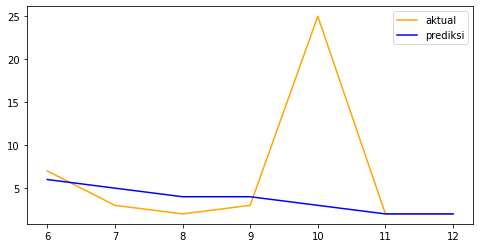

In [ ]:
# plotting perbandingan hasil aktual dan prediksi
X = df_test['bulan']
y1 = X_test
y2 = X_pred_test
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(X, y1, color='orange', label='aktual')
ax.plot(X, y2, color='blue', label='prediksi')
plt.legend(loc='best')
plt.show()

In [ ]:
X_pred2022 = []
for l in range(12):
  X_pred2022.append(round(St[16]+(bt[16]*(l+8))))
df_2022['qty_pred'] = X_pred2022
df_2022.to_excel('Hasil Prediksi 2022.xlsx', index = False)
df_2022

,bulan,tahun,qty_pred
0,1,2022,1
1,2,2022,0
2,3,2022,0
3,4,2022,-1
4,5,2022,-2
5,6,2022,-2
6,7,2022,-3
7,8,2022,-4
8,9,2022,-4
9,10,2022,-5


# sekop api

In [ ]:
df_sa = df[['bulan','tahun','qty_sa']]
df_sa

,bulan,tahun,qty_sa
0,1,2020,120
1,2,2020,36
2,3,2020,27
3,4,2020,36
4,5,2020,35
5,6,2020,4
6,7,2020,61
7,8,2020,82
8,9,2020,52
9,10,2020,24


In [ ]:
X_sa = df_sa['qty_sa'].values
X_train = X_sa[:-7]
X_test = X_sa[-7:]
df_2022 = p_2022

In [ ]:
temp_df = pd.DataFrame()
for i in [0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90]:
  for j in [0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90]:
    St = []
    bt = []
    X_pred_test=[]
    print(f'Alpha = {i} and Beta = {j}')
    for k in range(17):
      if k==0:
        St.append(X_train[k])
        bt.append(((X_train[k+1]-X_train[k])+(X_train[k+3]-X_train[k+2]))/2)
      else:
        St.append((i*X_train[k])+((1-i)*(St[k-1]+bt[k-1])))
        bt.append((j*(St[k]-St[k-1]))+((1-j)*bt[k-1]))
    for l in range(7):
        X_pred_test.append(round(St[16]+(bt[16]*(l+1))))
    print(X_pred_test)
    eval(X_test,X_pred_test)
    mad = round(metrics.mean_absolute_error(X_test,X_pred_test),2)
    mse = round(metrics.mean_squared_error(X_test,X_pred_test),2)
    mape = round(MAPE(X_test,X_pred_test),2)
    df3 = {'alpha':i,'beta':j,'MAD':mad,'MSE':mse,'MAPE':mape}
    temp_df = temp_df.append(df3, ignore_index=True)
temp_df.sort_values(by=['MAPE']).head(3)

Alpha = 0.1 and Beta = 0.1
[-169, -184, -200, -216, -232, -247, -263]
Hasil evaluasi
MAD : 264.57
MSE : 71458.86
MAPE : 1474.84
Alpha = 0.1 and Beta = 0.2
[-92, -93, -93, -94, -94, -94, -95]
Hasil evaluasi
MAD : 142.29
MSE : 22647.14
MAPE : 667.82
Alpha = 0.1 and Beta = 0.3
[-33, -23, -14, -4, 6, 16, 25]
Hasil evaluasi
MAD : 55.43
MSE : 6830.0
MAPE : 129.02
Alpha = 0.1 and Beta = 0.4
[12, 28, 43, 58, 74, 89, 105]
Hasil evaluasi
MAD : 61.43
MSE : 5466.29
MAPE : 364.37
Alpha = 0.1 and Beta = 0.5
[45, 63, 80, 98, 116, 133, 151]
Hasil evaluasi
MAD : 81.0
MSE : 8365.57
MAPE : 588.99
Alpha = 0.1 and Beta = 0.6
[67, 84, 102, 119, 136, 153, 171]
Hasil evaluasi
MAD : 95.57
MSE : 10761.29
MAPE : 710.41
Alpha = 0.1 and Beta = 0.7
[80, 95, 110, 125, 140, 155, 170]
Hasil evaluasi
MAD : 98.0
MSE : 11077.14
MAPE : 735.76
Alpha = 0.1 and Beta = 0.8
[86, 98, 109, 120, 131, 142, 154]
Hasil evaluasi
MAD : 91.29
MSE : 9470.71
MAPE : 687.57
Alpha = 0.1 and Beta = 0.9
[87, 93, 100, 107, 113, 120, 127]
Hasil

,alpha,beta,MAD,MSE,MAPE
15,0.2,0.7,36.14,2958.14,74.68
72,0.9,0.1,34.43,2623.57,77.09
63,0.8,0.1,38.86,2983.71,95.30


In [ ]:
temp_df.to_excel('Alpha beta optimal.xlsx', index = False)

In [ ]:
St = []
bt = []
X_pred_test=[]
ad = []
se = []
ape = []
for k in range(17):
  if k==0:
    St.append(X_train[k])
    bt.append(((X_train[k+1]-X_train[k])+(X_train[k+3]-X_train[k+2]))/2)
  else:
    St.append((0.2*X_train[k])+((1-0.2)*(St[k-1]+bt[k-1])))
    bt.append((0.7*(St[k]-St[k-1]))+((1-0.7)*bt[k-1]))
for l in range(7):
  X_pred_test.append(round(St[16]+(bt[16]*(l+1))))
  ad.append(np.abs(X_test[l]-X_pred_test[l]))
  se.append(ad[l]*ad[l])
  ape.append(round(np.abs((X_test[l]-X_pred_test[l])/X_test[l]*100), 2))
eval(X_test,X_pred_test)

Hasil evaluasi
MAD : 36.14
MSE : 2958.14
MAPE : 74.68


In [ ]:
df_hasil = df_sa[-7:]
df_hasil['qty_pred'] = X_pred_test
df_hasil['ad'] = ad
df_hasil['se'] = se
df_hasil['ape'] = ape
df_hasil.to_excel('Hasil Prediksi test dengan eval.xlsx', index = False)
df_hasil

<ipython-input-596-c3bfc1bfdf57>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hasil['qty_pred'] = X_pred_test
<ipython-input-596-c3bfc1bfdf57>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hasil['ad'] = ad
<ipython-input-596-c3bfc1bfdf57>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

,bulan,tahun,qty_sa,qty_pred,ad,se,ape
17,6,2021,156,31,125,15625,80.13
18,7,2021,45,26,19,361,42.22
19,8,2021,8,22,14,196,175.00
20,9,2021,78,17,61,3721,78.21
21,10,2021,17,13,4,16,23.53
22,11,2021,6,8,2,4,33.33
23,12,2021,31,3,28,784,90.32


In [ ]:
df_test = df_hasil[['bulan','tahun','qty_sa','qty_pred']]
df_test.to_excel('Hasil Prediksi test tanpa eval.xlsx', index = False)
df_test

,bulan,tahun,qty_sa,qty_pred
17,6,2021,156,31
18,7,2021,45,26
19,8,2021,8,22
20,9,2021,78,17
21,10,2021,17,13
22,11,2021,6,8
23,12,2021,31,3


In [ ]:
df_train = df_sa[:-7]
df_train['St'] = St
df_train['bt'] = bt
df_train.to_excel('Hasil Prediksi train.xlsx', index = False)
df_train

<ipython-input-598-9bd6ee5aa4e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['St'] = St
<ipython-input-598-9bd6ee5aa4e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['bt'] = bt


,bulan,tahun,qty_sa,St,bt
0,1,2020,120,120.000000,-37.500000
1,2,2020,36,73.200000,-44.010000
2,3,2020,27,28.752000,-44.316600
3,4,2020,36,-5.251680,-37.097556
4,5,2020,35,-26.879389,-26.268663
5,6,2020,4,-41.718441,-18.267936
6,7,2020,61,-35.789102,-1.329843
7,8,2020,82,-13.295156,15.346809
8,9,2020,52,12.041323,22.339578
9,10,2020,24,32.304721,20.886252


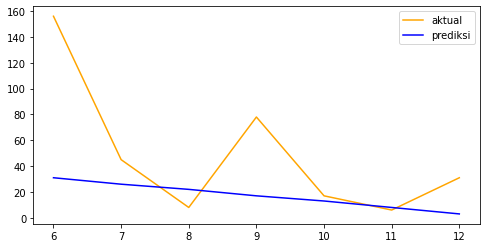

In [ ]:
# plotting perbandingan hasil aktual dan prediksi
X = df_test['bulan']
y1 = X_test
y2 = X_pred_test
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(X, y1, color='orange', label='aktual')
ax.plot(X, y2, color='blue', label='prediksi')
plt.legend(loc='best')
plt.show()

In [ ]:
X_pred2022 = []
for l in range(12):
  X_pred2022.append(round(St[16]+(bt[16]*(l+8))))
df_2022['qty_pred'] = X_pred2022
df_2022.to_excel('Hasil Prediksi 2022.xlsx', index = False)
df_2022

,bulan,tahun,qty_pred
0,1,2022,-1
1,2,2022,-6
2,3,2022,-10
3,4,2022,-15
4,5,2022,-20
5,6,2022,-24
6,7,2022,-29
7,8,2022,-33
8,9,2022,-38
9,10,2022,-43
